### Förberedelser

Importera matplotlib, NumPy och statistikmodulen i SciPy

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

Definera de $x$-värden för vilka vi vill beräkna sannolikhetsfunktionen $p_X(x)$

In [2]:
# Övre gränsen är exklusiv, så lägg till ett
xs = np.arange(0, 10 + 1)

print(xs)

[ 0  1  2  3  4  5  6  7  8  9 10]


### Bernoullifördelning

Vi börjar med $X \sim \mathrm{Ber}(0.3)$. Det finns två sätt att arbeta med stokastiska variabler i SciPy. Det första går ut på att skapa ett objekt som motsvarar den stokastiska variabeln och dess parametrar.

In [3]:
X = stats.bernoulli(0.3)

Sedan kan man anropa olika metoder hos objektet. Först plottar vi dess sannolikhetsfunktion (eng. “probility mass function (pmf)”).

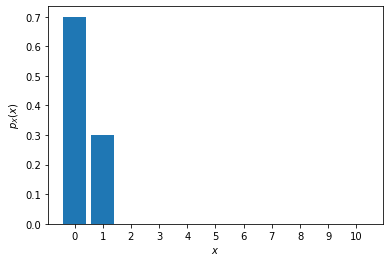

In [4]:
plt.bar(xs, X.pmf(xs))
plt.xticks(xs)
plt.xlabel("$x$")
plt.ylabel("$p_X(x)$")
plt.show()

En annan viktig metod är `rvs` (eng. “random variates”) som används för att generera utfall av variabeln.

In [5]:
vals = X.rvs(size=20)
print(vals)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


Antalet ettor här borde vara runt $0.3$.

In [6]:
prop = np.sum(vals == 1) / len(vals)
print(prop)

0.15


Ett annat sätt att använda stats-modulen i SciPy är att anropa funktionerna direkt utan att skapa ett objekt. Då måste man ange parametrarna varje gång.

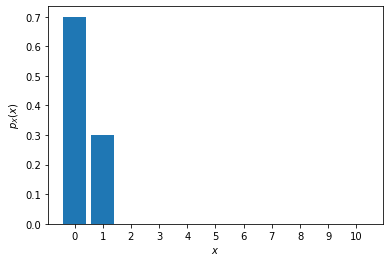

In [7]:
plt.bar(xs, stats.bernoulli.pmf(xs, p=0.3))
plt.xticks(xs)
plt.xlabel("$x$")
plt.ylabel("$p_X(x)$")
plt.show()

In [8]:
vals = stats.bernoulli.rvs(p=0.3, size=20)
print(vals)

[0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0]


### Likformig fördelning

Kan göra samma sak med $X \sim \mathrm{U}(\{1, 2, 3, 4, 5\})$.

In [9]:
# Övre gränsen är exklusiv återigen – lägg till ett
X = stats.randint(1, 5 + 1)

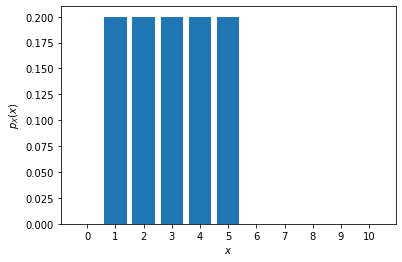

In [10]:
plt.bar(xs, X.pmf(xs))
plt.xticks(xs)
plt.xlabel("$x$")
plt.ylabel("$p_X(x)$")
plt.show()

In [11]:
vals = X.rvs(size=20)
print(vals)

[2 1 2 4 2 1 1 4 2 2 5 4 5 2 2 5 5 2 5 2]


Vi förväntar oss att runt en femtedel av värdena är ettor. Stämmer detta?

In [12]:
prop = np.sum(vals == 1) / len(vals)
print(prop)

0.15


### Geometrisk fördelning

En stokastisk variabel med geometrisk fördelning kan anta värden i alla positiva heltal, så det går inte att plotta hela denna sannolikhetsfunktion. Låt $X \sim \mathrm{Geo}(0.1)$.

In [13]:
X = stats.geom(0.1)

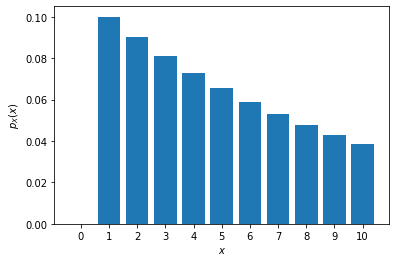

In [14]:
plt.bar(xs, X.pmf(xs))
plt.xticks(xs)
plt.xlabel("$x$")
plt.ylabel("$p_X(x)$")
plt.show()

In [15]:
vals = X.rvs(size=20)
print(vals)

[27 26  3  4  7  6 26 12  5  8 25 38  8  8 15  4  7 10  8 16]


Här ska andelen ettor vara ungefär $0.1$.

In [16]:
prop = np.sum(vals == 1) / len(vals)
print(prop)

0.0


### Binomialfördelning

Låt $X \sim \textrm{Bin}(10, 1 / 6)$.

In [17]:
X = stats.binom(10, 1 / 6)

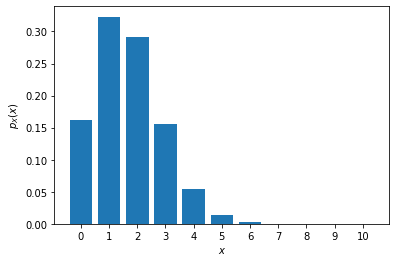

In [18]:
plt.bar(xs, X.pmf(xs))
plt.xticks(xs)
plt.xlabel("$x$")
plt.ylabel("$p_X(x)$")
plt.show()

In [19]:
vals = X.rvs(size=20)
print(vals)

[1 2 3 3 2 1 3 2 3 2 0 4 3 3 2 0 2 3 2 2]


Här ska andelen ettor vara $10 \cdot (1/6)\cdot(5/6)^9 \approx 0.323$.

In [20]:
prop = np.sum(vals == 1) / len(vals)
print(prop)

0.1


### Poissonfördelning

Låt $X \sim \mathrm{Po}(4)$.

In [21]:
X = stats.poisson(4)

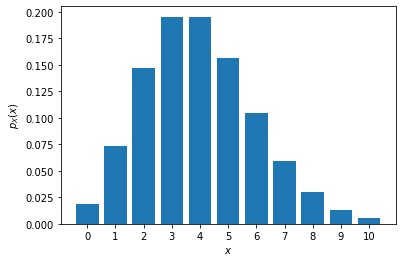

In [22]:
plt.bar(xs, X.pmf(xs))
plt.xticks(xs)
plt.xlabel("$x$")
plt.ylabel("$p_X(x)$")
plt.show()

In [23]:
vals = X.rvs(size=20)
print(vals)

[ 5  4  2  6  3  5  2  3  4  3  4  5  2 10  5  3  0  5  6  4]


Här kommer proportioner av ettor vara $4 \cdot e^{-4} / 1! \approx 0.0733$.

In [24]:
prop = np.sum(vals == 1) / len(vals)
print(prop)

0.0


### Hypergeometrisk fördelning

Nu låter vi $X \sim \mathrm{Hyp}(20, 12, 0.5)$. I stats-modulen motsvarar detta parametrarna `M = 20`, `n = 20 * 0.5`, `N = 12`.

In [25]:
X = stats.hypergeom(20, 10, 12)

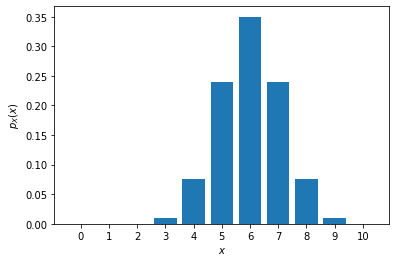

In [26]:
plt.bar(xs, X.pmf(xs))
plt.xticks(xs)
plt.xlabel("$x$")
plt.ylabel("$p_X(x)$")
plt.show()

In [27]:
vals = X.rvs(size=20)
print(vals)

[6 5 3 6 7 7 7 4 7 6 5 9 5 7 6 7 6 6 7 7]


### Likformig fördelning

Stats-modulen kan också användas för att modellera kontinuerliga stokastiska variabler. Till exempel kan vi betrakta $X \sim \mathrm{U}(1, 3)$. SciPy parametriserar många kontinuerliga fördelningar med avseende på läge (“location”) och skala (“scale”). För den likformiga fördelningen så avser läget det minsta värdet (i vårt fall 1) medan skalan är längden på intervallet (i vårt fall 2).

In [28]:
X = stats.uniform(loc=1, scale=2)

Som innan kan vi plotta olika funktioner för den stokastiska variabeln, som dess täthetsfunktion (eng. “probability density function (pdf)”).

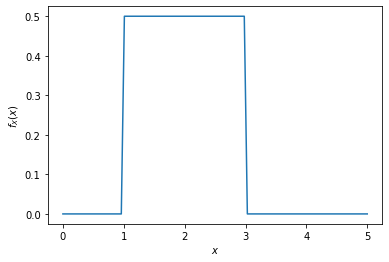

In [29]:
# Definiera ett linjärt rutnät mellan 0 och 5.
xs = np.linspace(0, 5, 100)

# Plotta täthetsfunktionen.
plt.plot(xs, X.pdf(xs))
plt.xlabel("$x$")
plt.ylabel("$f_X(x)$")
plt.show()

Vi kan också plotta fördelningsfunktionen (eng. “cumulative density function (cdf)”).

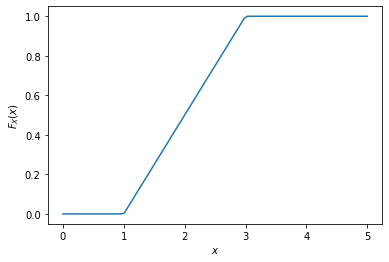

In [30]:
plt.plot(xs, X.cdf(xs))
plt.xlabel("$x$")
plt.ylabel("$F_X(x)$")
plt.show()

Som för de diskreta fördelningarna kan vi generera utfall från $X$ genom funktionen `rvs`.

In [31]:
vals = X.rvs(size=20)
print(vals)

[1.30862364 2.39648011 1.44276759 2.63868932 1.4551769  1.43910371
 1.01530687 2.86826142 1.07133999 2.1658556  2.08535028 2.246631
 2.12968247 2.11322495 2.76204944 1.17249807 2.07003775 1.71060417
 2.12982558 2.90262798]


### Exponentialfördelning

På samma sätt kan vi betrakta $X \sim \mathrm{Exp}(2)$. Notera att i föreläsningarna (och i boken) använder vi definitionen
$$
    f_X(x) = \left\{ \begin{array}{ll} \lambda e^{-\lambda x}, & x \ge 0 \\ 0, & x < 0 \end{array} \right..
$$
Med andra ord så parametriserar vi fördelningen med den inversa skalan (eller *intensiteten*) $\lambda$. Ju större $\lambda$, desto mer koncentreras fördelningen runt noll. SciPy parametriserar som bekant fördelningar med avseende på skalan $\theta$ och har då
$$
    f_X(x) = \left\{ \begin{array}{ll} \frac{1}{\theta} e^{-x / \theta}, & x \ge 0 \\ 0, & x < 0 \end{array} \right..
$$
Vi måste alltså ta $\theta = 1 / \lambda$ för att få fördelningarna att överensstämma. Eftersom vi hade $\lambda = 2$ ger detta då $\theta = 0.5$.

In [32]:
X = stats.expon(scale=1 / 2)

Plotta täthetsfunktionen och fördelningsfunktionen.

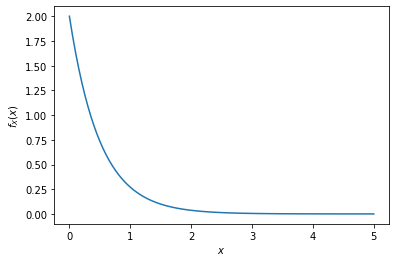

In [33]:
plt.plot(xs, X.pdf(xs))
plt.xlabel("$x$")
plt.ylabel("$f_X(x)$")
plt.show()

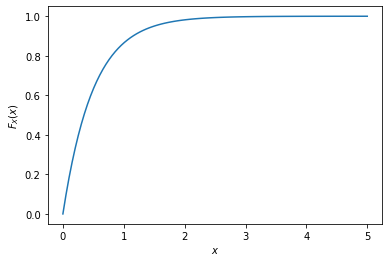

In [34]:
plt.plot(xs, X.cdf(xs))
plt.xlabel("$x$")
plt.ylabel("$F_X(x)$")
plt.show()

Som innan kan vi generera ett par värden hos den stokastiska variabeln.

In [35]:
vals = X.rvs(size=20)
print(vals)

[1.37088717e+00 1.43973013e-03 6.14458564e-01 1.72131710e-01
 5.60119581e-02 9.00901238e-01 4.46214332e-01 6.16015084e-01
 5.66788806e-01 4.15141117e-01 1.42545408e-01 5.35074846e-02
 8.49713568e-01 1.44561705e-01 2.55693278e-01 1.90952023e+00
 2.52230113e-01 6.73240389e-01 3.65959277e-01 9.17853183e-01]


### Gammafördelningen

På samma sätt kan vi betrakta $X \sim \mathrm{Gamma}(3, 2)$. I SciPy betecknas formparametern $\alpha$ med `a`. Som innan kan vi skapa objektet, plotta täthetsfunktion och fördelningsfunktion samt generera ett par värden.

In [36]:
X = stats.gamma(a=3, scale=1 / 2)

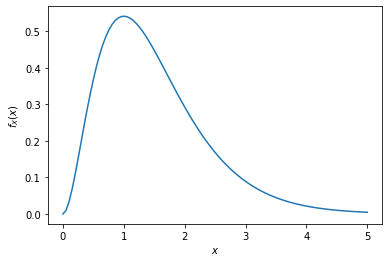

In [37]:
plt.plot(xs, X.pdf(xs))
plt.xlabel("$x$")
plt.ylabel("$f_X(x)$")
plt.show()

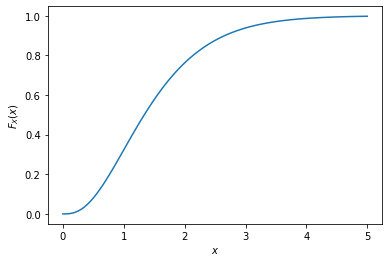

In [38]:
plt.plot(xs, X.cdf(xs))
plt.xlabel("$x$")
plt.ylabel("$F_X(x)$")
plt.show()

In [39]:
vals = X.rvs(size=20)
print(vals)

[0.6837218  1.23259158 1.03182723 1.77453221 0.49785873 0.68036812
 2.07314302 1.35379039 1.10916888 1.3463345  1.35269471 4.40898452
 0.82997018 4.50144722 0.26216054 1.3472248  1.72442167 0.46800339
 1.6151098  1.46415896]


### Normalfördelning

Till sist har vi normalfördelningen $\mathrm{N}(\mu, \sigma)$. Vi kan till exempel ta $X \sim \mathrm{N}(2, 0.4)$.

In [40]:
X = stats.norm(2, 0.4)

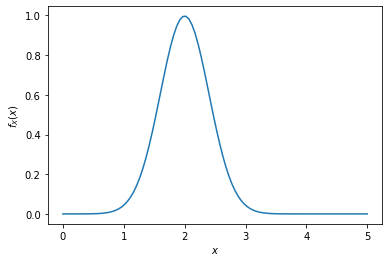

In [41]:
plt.plot(xs, X.pdf(xs))
plt.xlabel("$x$")
plt.ylabel("$f_X(x)$")
plt.show()

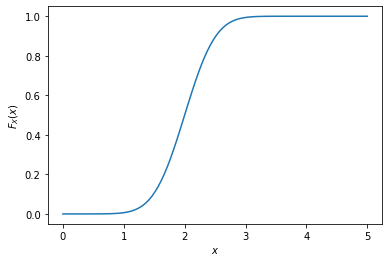

In [42]:
plt.plot(xs, X.cdf(xs))
plt.xlabel("$x$")
plt.ylabel("$F_X(x)$")
plt.show()

In [43]:
vals = X.rvs(size=20)
print(vals)

[1.89798022 1.53172009 1.80493717 2.07759036 2.08414054 1.96437861
 1.73956517 1.9592217  1.9692898  2.36728466 1.81968465 1.76237136
 1.71684    2.27626247 2.54284252 2.30029278 2.59006242 1.85210515
 1.92888183 2.28826867]


### Fördelningsfunktion för diskreta fördelningar

Vi noterar slutligen att metoden `cdf` också kan användas på diskreta fördelningar. Detta ger då den trappstegsfunktion som diskuterades på föreläsningen.

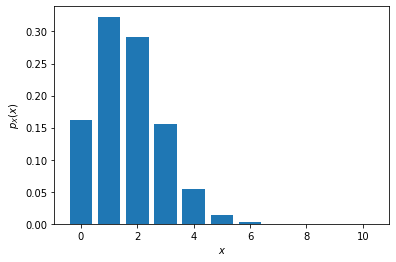

In [44]:
X = stats.binom(10, 1 / 6)

xs = np.arange(0, 10 + 1)
plt.bar(xs, X.pmf(xs))
plt.xlabel("$x$")
plt.ylabel("$p_X(x)$")
plt.show()

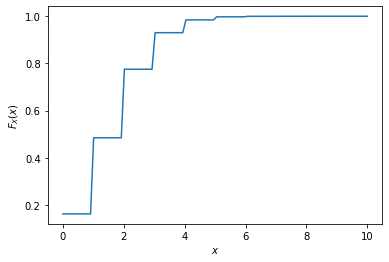

In [45]:
# Definiera finare uppdelning för att plotta fördelningsfunktionen.
xs = np.linspace(0, 10, 100)

plt.plot(xs, X.cdf(xs))
plt.xlabel("$x$")
plt.ylabel("$F_X(x)$")
plt.show()